In [2]:
import csv
import os
from datetime import datetime

FILE_NAME = "expenses.csv"

# ---------------- ADD EXPENSE ----------------
def add_expense():
    category = input("Enter Category (Food/Travel/Shopping/etc): ")
    amount = float(input("Enter Amount: "))
    description = input("Enter Description: ")
    date = datetime.now().strftime("%Y-%m-%d")

    file_exists = os.path.exists(FILE_NAME)

    with open(FILE_NAME, "a", newline="") as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["Date", "Category", "Amount", "Description"])
        writer.writerow([date, category, amount, description])

    print("Expense Added Successfully!")

# ---------------- VIEW EXPENSES ----------------
def view_expenses():
    if not os.path.exists(FILE_NAME):
        print("No expenses recorded yet!")
        return

    with open(FILE_NAME, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            print(row)

# ---------------- MONTHLY TOTAL ----------------
def monthly_total():
    if not os.path.exists(FILE_NAME):
        print("No data found!")
        return

    month = input("Enter Month (YYYY-MM): ")
    total = 0

    with open(FILE_NAME, "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row["Date"].startswith(month):
                total += float(row["Amount"])

    print(f"Total Expense for {month}: ₹{total}")

# ---------------- CATEGORY TOTAL ----------------
def category_total():
    if not os.path.exists(FILE_NAME):
        print("No data found!")
        return

    category = input("Enter Category: ")
    total = 0

    with open(FILE_NAME, "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row["Category"].lower() == category.lower():
                total += float(row["Amount"])

    print(f"Total Expense for {category}: ₹{total}")

# ---------------- MAIN MENU ----------------
def main():
    while True:
        print("\n===== EXPENSE TRACKER =====")
        print("1. Add Expense")
        print("2. View Expenses")
        print("3. Monthly Total")
        print("4. Category Total")
        print("5. Exit")

        choice = input("Enter choice: ")

        if choice == '1':
            add_expense()
        elif choice == '2':
            view_expenses()
        elif choice == '3':
            monthly_total()
        elif choice == '4':
            category_total()
        elif choice == '5':
            print("Exiting Expense Tracker 💰")
            break
        else:
            print("Invalid choice!")

main()



===== EXPENSE TRACKER =====
1. Add Expense
2. View Expenses
3. Monthly Total
4. Category Total
5. Exit
Expense Added Successfully!

===== EXPENSE TRACKER =====
1. Add Expense
2. View Expenses
3. Monthly Total
4. Category Total
5. Exit
['Date', 'Category', 'Amount', 'Description']
['2026-02-18', 'Food', '5000.0', 'Food is delectable']

===== EXPENSE TRACKER =====
1. Add Expense
2. View Expenses
3. Monthly Total
4. Category Total
5. Exit
Total Expense for 2026-02: ₹5000.0

===== EXPENSE TRACKER =====
1. Add Expense
2. View Expenses
3. Monthly Total
4. Category Total
5. Exit
Total Expense for Travel: ₹0

===== EXPENSE TRACKER =====
1. Add Expense
2. View Expenses
3. Monthly Total
4. Category Total
5. Exit
Expense Added Successfully!

===== EXPENSE TRACKER =====
1. Add Expense
2. View Expenses
3. Monthly Total
4. Category Total
5. Exit
Exiting Expense Tracker 💰


In [1]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


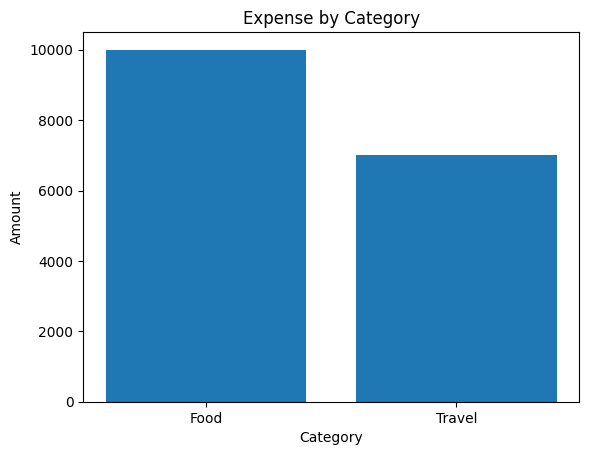

In [3]:
import tkinter as tk
from tkinter import messagebox
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt

FILE_NAME = "expenses.csv"

# ---------------- ADD EXPENSE ----------------
def add_expense():
    category = category_entry.get()
    amount = amount_entry.get()
    description = desc_entry.get()
    date = datetime.now().strftime("%Y-%m-%d")

    if not category or not amount:
        messagebox.showerror("Error", "Category and Amount required!")
        return

    try:
        amount = float(amount)
    except:
        messagebox.showerror("Error", "Invalid Amount!")
        return

    file_exists = os.path.exists(FILE_NAME)

    with open(FILE_NAME, "a", newline="") as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["Date", "Category", "Amount", "Description"])
        writer.writerow([date, category, amount, description])

    messagebox.showinfo("Success", "Expense Added!")
    category_entry.delete(0, tk.END)
    amount_entry.delete(0, tk.END)
    desc_entry.delete(0, tk.END)

# ---------------- VIEW EXPENSES ----------------
def view_expenses():
    if not os.path.exists(FILE_NAME):
        messagebox.showinfo("Info", "No expenses found!")
        return

    window = tk.Toplevel(root)
    window.title("All Expenses")
    window.geometry("500x400")

    text = tk.Text(window)
    text.pack(fill="both", expand=True)

    with open(FILE_NAME, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            text.insert(tk.END, str(row) + "\n")

# ---------------- CATEGORY TOTAL ----------------
def category_total():
    category = category_entry.get()
    total = 0

    if not os.path.exists(FILE_NAME):
        messagebox.showerror("Error", "No data found!")
        return

    with open(FILE_NAME, "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row["Category"].lower() == category.lower():
                total += float(row["Amount"])

    messagebox.showinfo("Category Total",
                        f"Total for {category}: ₹{total}")

# ---------------- MONTHLY TOTAL ----------------
def monthly_total():
    month = month_entry.get()
    total = 0

    if not os.path.exists(FILE_NAME):
        messagebox.showerror("Error", "No data found!")
        return

    with open(FILE_NAME, "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row["Date"].startswith(month):
                total += float(row["Amount"])

    messagebox.showinfo("Monthly Total",
                        f"Total for {month}: ₹{total}")

# ---------------- SHOW GRAPH ----------------
def show_graph():
    if not os.path.exists(FILE_NAME):
        messagebox.showerror("Error", "No data found!")
        return

    category_data = {}

    with open(FILE_NAME, "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            category = row["Category"]
            amount = float(row["Amount"])
            category_data[category] = category_data.get(category, 0) + amount

    categories = list(category_data.keys())
    amounts = list(category_data.values())

    plt.bar(categories, amounts)
    plt.title("Expense by Category")
    plt.xlabel("Category")
    plt.ylabel("Amount")
    plt.show()

# ---------------- GUI ----------------
root = tk.Tk()
root.title("💰 Expense Tracker")
root.geometry("500x600")
root.configure(bg="#1e1e1e")

tk.Label(root, text="Expense Tracker",
         font=("Arial",18,"bold"),
         bg="#1e1e1e", fg="cyan").pack(pady=10)

tk.Label(root, text="Category", bg="#1e1e1e", fg="white").pack()
category_entry = tk.Entry(root)
category_entry.pack()

tk.Label(root, text="Amount", bg="#1e1e1e", fg="white").pack()
amount_entry = tk.Entry(root)
amount_entry.pack()

tk.Label(root, text="Description", bg="#1e1e1e", fg="white").pack()
desc_entry = tk.Entry(root)
desc_entry.pack()

tk.Button(root, text="Add Expense",
          command=add_expense,
          bg="green", fg="white").pack(pady=5)

tk.Button(root, text="View Expenses",
          command=view_expenses,
          bg="blue", fg="white").pack(pady=5)

tk.Button(root, text="Category Total",
          command=category_total,
          bg="orange", fg="black").pack(pady=5)

tk.Label(root, text="Month (YYYY-MM)",
         bg="#1e1e1e", fg="white").pack(pady=5)
month_entry = tk.Entry(root)
month_entry.pack()

tk.Button(root, text="Monthly Total",
          command=monthly_total,
          bg="purple", fg="white").pack(pady=5)

tk.Button(root, text="Show Graph",
          command=show_graph,
          bg="red", fg="white").pack(pady=10)

root.mainloop()
